In [13]:
pip install influxdb-client

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

airline = pd.read_csv("airline_passengers.csv")
train_airline = airline[:108] 
test_airline = airline[108:] 

<AxesSubplot:>

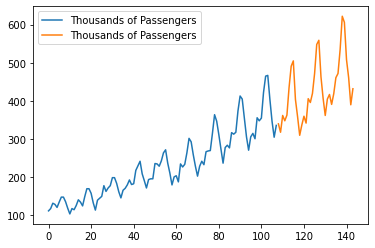

In [15]:
ax = train_airline.plot()
test_airline.plot(ax=ax)

In [16]:
from datetime import datetime

from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS

# Local
url = "http://influxdb:8086"
token = "sda-token"
org = "sda"
bucket = "training"

client = InfluxDBClient(url=url, token=token)
write_api = client.write_api(write_options=SYNCHRONOUS)

In [17]:
from datetime import datetime
from datetime import timedelta

base = datetime.now().replace(second=0,microsecond=0) - timedelta(minutes=3)

In [18]:
base

datetime.datetime(2021, 12, 8, 14, 9)

In [19]:
from random import gauss
import time

for index, row in train_airline.iterrows():
    base += timedelta(seconds=1)
    point = Point("airline-train").field("passengers", row['Thousands of Passengers']).time(base)
    print(point.to_line_protocol())
    write_api.write(bucket, org, point)
    
for index, row in test_airline.iterrows():
    base += timedelta(seconds=1)
    point = Point("airline-test").field("passengers", row['Thousands of Passengers']).time(base)
    print(point.to_line_protocol())
    write_api.write(bucket, org, point)

airline-train passengers=112i 1638972541000000000
airline-train passengers=118i 1638972542000000000
airline-train passengers=132i 1638972543000000000
airline-train passengers=129i 1638972544000000000
airline-train passengers=121i 1638972545000000000
airline-train passengers=135i 1638972546000000000
airline-train passengers=148i 1638972547000000000
airline-train passengers=148i 1638972548000000000
airline-train passengers=136i 1638972549000000000
airline-train passengers=119i 1638972550000000000
airline-train passengers=104i 1638972551000000000
airline-train passengers=118i 1638972552000000000
airline-train passengers=115i 1638972553000000000
airline-train passengers=126i 1638972554000000000
airline-train passengers=141i 1638972555000000000
airline-train passengers=135i 1638972556000000000
airline-train passengers=125i 1638972557000000000
airline-train passengers=149i 1638972558000000000
airline-train passengers=170i 1638972559000000000
airline-train passengers=170i 1638972560000000000
